### Building a ROC Curve 
---

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

%matplotlib inline 

In [2]:
data = load_breast_cancer()

In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = 1 - data.target

### Let's work towards plotting a ROC Curve once 

In [8]:
X_train , X_test, y_train, y_test = train_test_split(X,y, random_state=23)

In [33]:
lr = LogisticRegression(solver = 'lbfgs', max_iter=10000)

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Take a look at our predictions - can we calculate the TPR and FPR for the threshold value of .5? 

### Remember 
---
### TPR = TP / (TP + FN) 

### FPR = FP / (FP + TN)

### Can you use `.zip()` here?

In [10]:
preds= lr.predict(X_test)



In [14]:
(y_test == preds).mean()

0.965034965034965

In [17]:
(y_test == preds).sum()

138

In [23]:
results = []
for actual, prediction in zip(y_test, preds):
    if actual == prediction:
        results.append(1)
    else:
        results.append(0)
        
sum(results) / len(results)

0.965034965034965

In [16]:
len(preds)

143

In [24]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [11]:
preds

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [34]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [35]:
fp

1

In [28]:
true_pos = 0
false_pos = 0
true_neg = 0
false_neg = 0
for actual, prediction in zip(y_test, preds):
    if (actual == 1) & (prediction == 1):
        true_pos += 1
    elif (actual == 0) & (prediction == 1):
        false_pos += 1 
    elif (actual == 0) & (prediction == 0):
        true_neg += 1
    elif (actual == 1) & (prediction == 0):
        false_neg += 1
tpr = true_pos/(true_pos+false_neg)
fpr = false_pos/(false_pos+true_neg)

In [29]:
tpr

0.9166666666666666

In [30]:
fpr

0.010526315789473684

In [39]:
lr.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1])

In [51]:
thresholds = np.linspace(0, 1.0001, 1000)

In [52]:
thresholds

array([0.        , 0.0010011 , 0.0020022 , 0.0030033 , 0.0040044 ,
       0.00500551, 0.00600661, 0.00700771, 0.00800881, 0.00900991,
       0.01001101, 0.01101211, 0.01201321, 0.01301431, 0.01401542,
       0.01501652, 0.01601762, 0.01701872, 0.01801982, 0.01902092,
       0.02002202, 0.02102312, 0.02202422, 0.02302533, 0.02402643,
       0.02502753, 0.02602863, 0.02702973, 0.02803083, 0.02903193,
       0.03003303, 0.03103413, 0.03203524, 0.03303634, 0.03403744,
       0.03503854, 0.03603964, 0.03704074, 0.03804184, 0.03904294,
       0.04004404, 0.04104515, 0.04204625, 0.04304735, 0.04404845,
       0.04504955, 0.04605065, 0.04705175, 0.04805285, 0.04905395,
       0.05005506, 0.05105616, 0.05205726, 0.05305836, 0.05405946,
       0.05506056, 0.05606166, 0.05706276, 0.05806386, 0.05906496,
       0.06006607, 0.06106717, 0.06206827, 0.06306937, 0.06407047,
       0.06507157, 0.06607267, 0.06707377, 0.06807487, 0.06907598,
       0.07007708, 0.07107818, 0.07207928, 0.07308038, 0.07408

In [62]:
thresholds = list(np.linspace(0, 1.001, 1000))
tprs = []
fprs = []
for value in thresholds:
    manual_preds = []
    for p in lr.predict_proba(X_test)[:,1]:
        if p < value:
            manual_preds.append(0)
        else:
            manual_preds.append(1)
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    for actual, prediction in zip(y_test, manual_preds):
        if (actual == 1) & (prediction == 1):
            true_pos += 1
        elif (actual == 0) & (prediction == 1):
            false_pos += 1 
        elif (actual == 0) & (prediction == 0):
            true_neg += 1
        elif (actual == 1) & (prediction == 0):
            false_neg += 1
    tprs.append(true_pos/(true_pos+false_neg))
    fprs.append(false_pos/(false_pos+true_neg))

In [54]:
tpr , fpr

(0.9375, 0.021052631578947368)

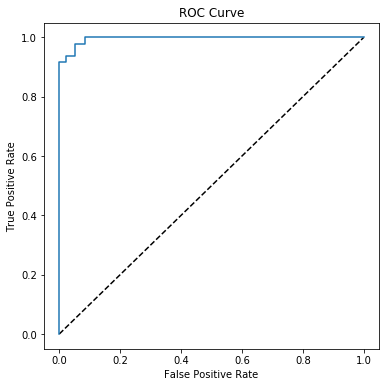

In [63]:
fig, ax = plt.subplots(figsize=(6,6))

ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
ax.plot([0,1],[0,1], linestyle= '--', color='black')
ax.plot(fprs, tprs)
ax.set_title('ROC Curve');

In [27]:
for actual, prediction in zip(y_test, preds):
    print(actual, prediction)

0 0
0 0
1 1
0 0
1 1
1 1
1 1
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
1 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
1 1
1 1
0 0
1 1
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
1 1
0 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
0 0
1 1
1 1
0 0
1 1
0 0
1 1


### What is the default threshold in sci-kit learn? - How can we manually change it? 

In [38]:
### function 


### Let's aim to calculate the TPR and FPR over a range of different alpha values 

### Let's start plotting!